# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: **Carlos Esteban Posada**  <br>
Email: crls.esteban@hotmail.com <br>
URL Drive: https://colab.research.google.com/drive/1mnrmTvrbTqL6zBqZvw6B4lGdUHkUeUkD?usp=sharing <br>

URL GIT: https://github.com/cposada8/03MAIR-Algoritmos-de-Optimizacion-CEPM/blob/main/Seminario/Seminario_Algoritmos.ipynb <br>

Problema:
**Sesiones de doblaje** <br>


# Tabla de contenidos:
1. Descripción del problema
2. ¿Cuántas posibilidades de solución hay?
3. Modelo para el espacio de soluciones
4. Según el modelo para el espacio de soluciones:
	* ¿Cuál es la función objetivo?
	* ¿Es un problema de maximización o minimización?
5. Diseña un algoritmo para resolver el problema por fuerza bruta
6. Diseña un algoritmo que mejore la la complejidad del algoritmo por fuerza bruta
	* Solución por técnica voraz
	* Solución por búsqueda local
	* Solución por algoritmos genéticos
7. Diseña un juego de datos de entrada aleatorios
8. Aplica el algoritmo al juego de datos generado
9. Enumera las referencias que has utilizado
10. Describe brevemente las líneas de cómo crees que es posible avanzar en el estudio del tema


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Carga de los datos
data = pd.read_csv("actores_tomas.csv", sep=";")
data = data.set_index("toma")

## 1. Descripción del problema - Contexto 
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio
de grabación independientemente del número de tomas que se graben. No es posible grabar
más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que se gasto
por los servicios de los actores de doblaje sea el menor posible.


Los datos originales pueden ser consultados en: https://bit.ly/36D8IuK

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




## 2. ¿Cuántas posibilidades de solución hay?

### Posibilidades sin tener en cuenta las restricciones
En nuestro caso tenemos un problema de 30 tomas que debemos acomodar en grupos de máximo 5 tomas por grupo. Cada grupo corresponderá a un día. 

Sin tener en cuenta las restricciones esto lo podríamos modelar como un vector de 30 posiciones en donde cada entrada traerá el índice de la toma. 

Ejemplo
|1, 2, 3, 4, 5, 6|,  |7, 8, 9, 10, 11, 12|, ...


En el ejemplo anterior, las tomas 1, 2, 3, 4, 5, y 6 estarían en la misma sesión de doblaje.

De esta manera el espacio de solución inicial, sin tener en cuenta las restricciones sería todas las formas de acomodar 30 elementos distintos en un vector de 30 posiciones. 

Esto se soluciona de la siguiente manera: 30 * 29 * 28 * ... * 2 * 1
Es decir 30! (30 factorial)

In [5]:
numero_soluciones_brutas = math.factorial(30)
print(f"El número de soluciones (sin tener en cuenta las restricciones) posibles es: {numero_soluciones_brutas}")

El número de soluciones (sin tener en cuenta las restricciones) posibles es: 265252859812191058636308480000000


Como podrá notar, es un número tan grande que prácticamente es ilegible. Lo único que se puede adelantar es que tiene 33 dígitos. 

### Posibilidades teniendo en cuenta las restricciones

El espacio de solución sin restricciones contiene en realidad muchas combinaciones que para este problema vendrían siendo las mismas. 

Por ejemplo una sesión de doblaje | 1, 2, 3, 4, 5, 6 | sería, para este caso, exactamente igual a la sesión |2, 1, 3, 4, 5, 6| e igual a |6, 5, 4, 3, 2, 1|. 

En resumen, no nos importa el orden de las tomas que queden en cada sesión (bloque de 6 tomas). 

Por lo tanto calculemos las posibilidades de solución teniendo en cuenta estas restricciones.

Para realizar esta tarea, tendremos que dividir los cálculos en subproblemas más sencillos. 

Así, ya no vamos a calcular las posibilidades de todo el vector de 30, sino que calcularemos por sesiones.

 ¿De cuántas formas diferentes puedo armar la primera sesión? 
 
Como tenemos 30 tomas, las formas para armar la primera sesión (sin importar el orden) sería la combinación de 30 elementos tomados de a 6.   

Luego de este paso, deberemos calcular la segunda sesión, para la cual tenemos 24 tomas disponibles. 

Y de esta manera calculamos por bloque de sesiones todas las combinaciones posibles


$$
combinacionesValidas = {30 \choose 6 } * {24 \choose 6 } * {18 \choose 6 } * {12 \choose 6 } * {6 \choose 6 }
$$

In [6]:
def combinatoria(n, k):
    # Esta función recibe n y k y retorna el número 
    # de combinaciones de n elementos tomados de k en k
    comb = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    return comb

In [7]:
disponibles = [30, 24, 18, 12, 6]
posibilidades_sesion = [combinatoria(dispon, 6) for dispon in disponibles]

In [8]:
total_combinaciones_validas = 1
for i, disp in enumerate(disponibles):
  print(f"Sesión {i+1}")
  print(f"tomas disponibles: {disp}")
  print(f"combinaciones posibles para la sesión {posibilidades_sesion[i]}")
  print()
  total_combinaciones_validas *= posibilidades_sesion[i] 

Sesión 1
tomas disponibles: 30
combinaciones posibles para la sesión 593775.0

Sesión 2
tomas disponibles: 24
combinaciones posibles para la sesión 134596.0

Sesión 3
tomas disponibles: 18
combinaciones posibles para la sesión 18564.0

Sesión 4
tomas disponibles: 12
combinaciones posibles para la sesión 924.0

Sesión 5
tomas disponibles: 6
combinaciones posibles para la sesión 1.0



In [9]:
print(f"El total de combinaciones válidas es {total_combinaciones_validas}")

El total de combinaciones válidas es 1.3708741675893263e+18


Nótese que ahora el espacio de solución válido es de 10^18, lo cuál sigue siendo muy grande, pero significativamente más pequeño que el espacio solución sin tener en cuenta las restricciones que presentaba un tamaño del orden 10^33

De todas maneras sigue siendo un espacio solución inviable para evaluar todas las posibles soluciones

## 3. Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Inicialmente se puede pensar en que una buena estructura para el espacio de solución es una matriz de tamaño 5x6. De tal forma que cada fila contiene una sesión o día de grabación.

Sin embargo por simplicidad y velocidad en cálculos, esto mismo se puede representar como un vector de 30 posiciones. Teniendo en cuenta que la evaluación de la se hará por bloques de 6 tomas.

## 4. Según el modelo para el espacio de soluciones:<br>


### (*)¿Cual es la función objetivo?
La función objetivo contará la cantidad de actores diferentes que aparecen en una sesión. 

Una sesión será un bloque de 6 tomas. 

Luego se suman los valores de cada sesión y esto será el resultado de la función objetivo


#### Ejemplo de la función Objetivo

In [10]:
def crear_solucion_aleatoria(n):
    # n es el tamaño del vector solución
    # esta función retornará un vector de tamaño n con los números
    # de 0 a n-1 sin repetir, en un orden aleatorio
    solucion = np.random.choice(range(n), n, replace=False)
    return solucion

def evaluar_dia(tomas_dia):
    # tomas_dia debe ser un vector con los índices de las tomas que se incluirán en un día
    return data.iloc[tomas_dia].max().sum()

def get_matriz_from_solucion(solucion, num_sesiones=5, tomasxsesion=6):
    # esta función recibe un vector y retorna una matriz de tamaño
    # tomasxsesion, num_sesiones
    # Esta matriz debe ser de tamaño n=tomasxsesion x num_sesiones
    return np.array(solucion).reshape(num_sesiones, tomasxsesion)

In [11]:
def evaluar_solucion(solucion, num_sesiones=5, tomasxsesion= 6):
    # La solución es un vector de tal forma que cada bloque de tomasxsesion
    # será un día
    costo = 0
    sol_bloque = get_matriz_from_solucion(np.array(solucion), num_sesiones, tomasxsesion)
    for indices_dia in sol_bloque:
        costo += evaluar_dia(indices_dia)
    return costo

In [13]:
# Ejemplo de solución
solucion = crear_solucion_aleatoria(30)
print("la solucón cruda sería:")
print(solucion)

print()
print("la solución separada por bloques (sesiones) sería")
sol_bloq = get_matriz_from_solucion(solucion)
print(sol_bloq)

la solucón cruda sería:
[17 27 29  6  5 21  7 25 23  1 10 16  9 14 11 22  4  2  3  0 15 28  8 12
 20 18 13 19 26 24]

la solución separada por bloques (sesiones) sería
[[17 27 29  6  5 21]
 [ 7 25 23  1 10 16]
 [ 9 14 11 22  4  2]
 [ 3  0 15 28  8 12]
 [20 18 13 19 26 24]]


In [14]:
costosxdia = []
for i, indices_dia  in enumerate(sol_bloq):
    print("#"*50)
    print(f"dia: {i+1}")
    costo_dia = evaluar_dia(indices_dia)
    print("costo día:", costo_dia)
    display(data.iloc[indices_dia])
    costosxdia.append(costo_dia)
    print()
    print()
print(f"total costo: {np.sum(costosxdia)}")

##################################################
dia: 1
costo día: 6


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
18,0,0,1,0,0,1,0,0,0,0
28,1,0,0,1,0,0,0,0,0,0
30,1,0,0,1,0,0,0,0,0,0
7,1,1,0,1,1,0,0,0,0,0
6,1,1,0,1,1,0,0,0,0,0
22,1,1,1,1,0,0,0,0,0,0




##################################################
dia: 2
costo día: 8


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
8,1,1,0,0,0,1,0,0,0,0
26,1,0,1,0,1,0,0,0,1,0
24,0,0,1,0,0,1,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
11,1,1,1,0,1,0,0,1,0,0
17,1,0,1,0,0,0,0,0,0,0




##################################################
dia: 3
costo día: 9


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
10,1,1,0,0,0,1,0,0,1,0
15,1,1,0,0,0,0,1,0,0,0
12,1,1,1,1,0,1,0,0,0,0
23,1,0,1,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,1,0,0,0




##################################################
dia: 4
costo día: 9


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
4,1,1,0,0,0,0,1,1,0,0
1,1,1,1,1,1,0,0,0,0,0
16,0,0,0,1,0,0,0,0,0,1
29,1,0,0,0,1,1,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0
13,1,0,0,1,1,0,0,0,0,0




##################################################
dia: 5
costo día: 8


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
21,0,0,0,0,0,1,0,1,0,0
19,1,0,1,0,0,0,0,0,0,0
14,1,0,1,0,0,1,0,0,0,0
20,1,0,1,1,1,0,0,0,0,0
27,0,0,0,1,1,0,0,0,0,0
25,1,1,0,1,0,0,0,0,0,1




total costo: 40


In [15]:
print("los costos por día son")
for i, costo in enumerate(costosxdia):
    print(f"costo sesión {i+1}: {costo}")
print()
print(f"total costo: {np.sum(costosxdia)}")

los costos por día son
costo sesión 1: 6
costo sesión 2: 8
costo sesión 3: 9
costo sesión 4: 9
costo sesión 5: 8

total costo: 40


### (*)¿Es un problema de maximización o minimización?

En nuestro caso queremos encontrar el mínimo costo de los actores al repartir las tomas en las sesiones. 

Por lo tanto este se trata de un problema de **MINIMIZACIÓN**

## 5. Diseña un algoritmo para resolver el problema por fuerza bruta

Para solucionar el problema por fuerza bruta, se pueden buscar todas las combinaciones posibles de vectores de 30 posiciones sin repetir elementos. 

En esta sección se implementará tal algoritmo, pero no se ejecutará debido al enorme número de combinaciones posible.   
**Probablemente usted no vivirá para ver que el programa termine (ni sus hijos tampoco, ni sus nietos, y si aún hubiera planeta, tampoco lo alcanzarán a ver los nietos de los nietos de sus nietos)**

### Algoritmo por fuerza bruta

In [16]:
import itertools 
verbose=True

In [17]:
def solucion_fuerza_bruta(max_iterations=30, verbose=False):
    # max_iterations para limitar a que no haga TODAS porque jamás terminaría

    mejor_solucion = None
    mejor_costo = np.inf

    for i, solucion_iter in enumerate(itertools.permutations(range(30),30)):
        
        costo_iter = evaluar_solucion(solucion_iter)
        if verbose:
            print(i,"solución: ", solucion_iter)
            print("costo", costo_iter)
            print()

        # actualización de mejor solución
        if costo_iter < mejor_costo:
            mejor_solucion = solucion_iter
            mejor_costo = costo_iter
            print(i,"solución: ", solucion_iter)
            print("costo", costo_iter)
            print()

        # criterio de parada
        if i+1>=max_iterations:
            break

    return (mejor_solucion, mejor_costo)

In [18]:
solucion, costo = solucion_fuerza_bruta(1000)
print(f"la mejor solución encontrada fue {solucion}")
print(f"con un costo de {costo}")

0 solución:  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)
costo 38

720 solución:  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29)
costo 37

la mejor solución encontrada fue (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29)
con un costo de 37


**NOTA**: recuerde que en la sección anterior limitamos a cierto número la cantidad de soluciones evaluadas, dado que no presenciaría con vida el final de este algoritmo si lo dejamos evaluar todas las soluciones

### Calcula la complejidad del algoritmo por fuerza bruta

Para calcular la complejidad debemos tener en cuenta la complejidad de la función de evaluación (función objetivo) que es de orden **n** (pero esto se despreciará como puede apreciar más adelante)

Ahora esto lo debemos multiplicar por cada una de las posibilidades que sale del método de fuerza bruta. 
Este método retornará **n!** soluciones diferentes

por lo tanto el orden algorítmico de la solución por fuerza bruta es **O(n!)**

## 6. (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta
Argumenta porque crees que mejora el algoritmo por fuerza bruta

Dada la naturaleza factorial del problema, en las siguientes sub-secciones se propondrán una serie de algoritmos que permitan llegar a soluciones buenas, pero no garantizaremos que se encuentra el óptimo

### Solución por técnica voraz

En esta sección emplearemos la técnica voraz para encontrar una solución buena. Cabe aclarar que en este caso no encontraremos el óptimo, pues encontraremos la mejor solución en cada iteración, pero esto no garantiza llegar al mínimo global

Lo que haremos será armar las sesiones de una en una. Buscando siempre la combinación de sesiones de menor costo. 

Así, la primera sesión será la del más bajo costo dentro de todas las combinaciones de tomas disponibles para una sesión. 

Luego, con las tomas que quedan, se buscará otra vez la nueva sesión de costo mínimo y así hasta que hayamos utilizado todas las tomas

#### Algoritmo solución voraz

In [19]:
def get_subsets_optimos(tomas_disponibles):
    # esta función recibe una lista de tomas: tomas_disponibles
    # y encontrará la configuración de 6 tomas que hace que la sesión
    # tenga el costo mínimo
    stuff = tomas_disponibles
    costo_min = np.inf
    best_subset = []
    
    # parámetros para imprimir
    total_combinaciones = combinatoria(len(tomas_disponibles), 6)
    imprimir_cada = max(total_combinaciones//20, 1)
    for i, subset in enumerate(itertools.combinations(tomas_disponibles, 6)):
        if (i+1) % imprimir_cada == 0:
            print(f"Iteración # {i+1}/{'{:.0f}'.format(total_combinaciones)} ({'{:.2f}'.format((i+1)/total_combinaciones*100)}%)")
        costo_actual = evaluar_dia(list(subset))
        if costo_actual < costo_min:
            costo_min = costo_actual
            best_subset = subset
            print(f"iteración: {i}, costo: {costo_min}, combinación: {best_subset}")
    
    return best_subset

In [20]:
tomas_disponibles = set(range(30))
subsets_optimos = []
for i in range(5):
    print("#" * 50)
    print(f"hay {len(tomas_disponibles)} disponibles")
    print()
    best_subset = get_subsets_optimos(tomas_disponibles)
    
    # actualizo los disponibles
    tomas_disponibles = tomas_disponibles - set(best_subset)
    subsets_optimos.append(list(best_subset))
    print()

##################################################
hay 30 disponibles

iteración: 0, costo: 7, combinación: (0, 1, 2, 3, 4, 5)
iteración: 626, costo: 6, combinación: (0, 1, 2, 5, 6, 8)
iteración: 7850, costo: 5, combinación: (0, 1, 5, 6, 8, 12)
Iteración # 29688/593775 (5.00%)
Iteración # 59376/593775 (10.00%)
Iteración # 89064/593775 (15.00%)
Iteración # 118752/593775 (20.00%)
Iteración # 148440/593775 (25.00%)
Iteración # 178128/593775 (30.00%)
Iteración # 207816/593775 (35.00%)
iteración: 209914, costo: 4, combinación: (1, 12, 16, 18, 19, 22)
Iteración # 237504/593775 (40.00%)
Iteración # 267192/593775 (45.00%)
Iteración # 296880/593775 (50.00%)
Iteración # 326568/593775 (55.00%)
Iteración # 356256/593775 (60.00%)
Iteración # 385944/593775 (65.00%)
Iteración # 415632/593775 (70.00%)
Iteración # 445320/593775 (75.00%)
Iteración # 475008/593775 (80.00%)
Iteración # 504696/593775 (85.00%)
Iteración # 534384/593775 (90.00%)
Iteración # 564072/593775 (95.00%)
iteración: 583792, costo: 3,

* Este método lo primero que hizo fue buscar la combinación de costo mínimo de 6 tomas dentro de las 30 disponibles. Esto dio un espacio de solución de 593775 soluciones y las evaluó todas, encontrando una combinación de costo **3**, y así guardamos esta sesión como la más barata de todas.

* Luego buscó la siguiente sesión más barata, pero ya solo tiene 24 tomas disponibles, lo cual baja el número de combinaciones a **134596**. Esto con un costo de 4

* Luego de evaluarlas todas, ya tenemos 2 sesiones armadas y se repite este mismo ejercicio para encontrar la 3ra sesión más barata. Con 18 tomas disponibles tiene **18564** soluciones posibles. Esto con un costo de 6

* Siguiente encontró la solución más barata dentro de las 12 tomas posibles, lo cuál implicó buscar entre **924** soluciones posibles. Esto con un costo de 7

* y por último quedaron las tomas que no entraron dentro de ninguna otra sesión, generándonos la última sesión con un costo de 9.

In [21]:
subsets_optimos

[[13, 16, 17, 18, 22, 23],
 [1, 12, 19, 26, 27, 29],
 [0, 2, 5, 6, 8, 14],
 [3, 4, 7, 11, 20, 21],
 [9, 10, 15, 24, 25, 28]]

In [22]:
solucion_voraz = np.array(subsets_optimos).reshape(30)
solucion_voraz

array([13, 16, 17, 18, 22, 23,  1, 12, 19, 26, 27, 29,  0,  2,  5,  6,  8,
       14,  3,  4,  7, 11, 20, 21,  9, 10, 15, 24, 25, 28])

In [23]:
print(f"la solución voraz tiene un costo de: {evaluar_solucion(solucion_voraz)}")

la solución voraz tiene un costo de: 29


#### (*)Calcula la complejidad de la solución voraz 
La solución por técnica voraz ya vendrá con unos pasos establecidos donde en cada etapa deberá buscar todas las combinaciones de 6 elementos disponibles entre la cantidad de tomas que aún no se han usado. 

Por tanto la primera etapa es de orden 
$O( \tfrac{n!}{6(n-6)!})$

### Solución por búsqueda local
En esta sección se implementará búsqueda local para verificar si se encuentran mejores soluciones a la de costo 29 hallada en la sección anterior

In [24]:
def swap_indices(lista, i, j):
    # esta función retorna una lista donde los elementos en las posiciones
    # i y j están intercambiados respecto a la lista original
    # ejemplo: [1, 2, 3, 4, 5], i=1, j=3
    # intercambirá los elementos en las posiciones i y j
    # retornará: [1, 4, 3, 2, 5] Nótese como se intercambiarón el 2 y el 4
    resp = lista.copy()
    resp[i], resp[j] = lista[j], lista[i]
    return resp
# swap_indices([1, 2, 3, 4, 5], 1, 3)

In [25]:
def generar_vecinos_0(solucion, tomasxsesion = 6):
  # genera soluciones vecinas cambiando todas las parejas posibles de nodos

    n = len(solucion)
    vecinos = [] # lista con todas las soluciones vecinas
  
    for i in range(n-1):
        for j in range(i+6, n):
            vecino = swap_indices(solucion, i, j)
            vecinos.append(vecino)
    return vecinos

def generar_vecinos_1(solucion, num_sesiones = 5, tomasxsesion = 6):
    vecinos = []
    for bloque1 in range(num_sesiones):
        for bloque2 in range(bloque1+1, num_sesiones):
            for ind1 in range(bloque1*tomasxsesion, bloque1*tomasxsesion+tomasxsesion):
                for ind2 in range(bloque2*tomasxsesion, bloque2*tomasxsesion+tomasxsesion):
                    vecino = swap_indices(np.array(solucion), ind1, ind2)
                    vecinos.append(vecino)
    return vecinos

def get_mejor_vecino(solucion, generador_vecindad=generar_vecinos_1):
    # esta función retorna la solución vecina con mejor desempeño
    # y retorna también la mejor distancia
    # recibe la solucion de referencia
    # y la función generadora de vecindad

    # 1. Generar todos los vecinos según la función generadora de vecindad
    vecinos = generador_vecindad(solucion)

    mejor_vecino = None
    mejor_costo = np.inf
    for vecino in vecinos:
        costo_actual = evaluar_solucion(vecino.reshape(5, 6))
        if costo_actual <= mejor_costo:
            mejor_vecino = vecino
            mejor_costo = costo_actual
    return mejor_vecino, mejor_costo

In [26]:
def busqueda_local(n = 30, max_iter= 1000, solucion=None, verbose=False, generador_vecindad=generar_vecinos_1):
  # Esta función realizará una búsqueda local exhaustiva.
  # el punto de partida puede ser una solución pasada como argumento, en caso
  # de que este no sea entregado, el punto de partida será una solución aleatoria
  # se puede modificar el generador de vecindad
    
  
  # 1. Generar solución de referencia
  # será igual a la solucion si esta fue pasada como argumento
  # de otro modo será una solucion aleatoria
  solucion_referencia = solucion if solucion is not None else crear_solucion_aleatoria(n) 
  
  # se inicializan la mejor solución y mejor distancia
  mejor_solucion = solucion_referencia
  mejor_costo = evaluar_solucion(mejor_solucion.reshape(5, 6))
  iteracion = 0 # contador para saber en qué iteración vamos
  hubo_mejora = True # marca para controlar si se mejoró o sino parar el algoritmo
  while iteracion < max_iter and hubo_mejora:
    iteracion += 1

    # se obtiene el mejor vecino con su respectiva distancia
    vecino, costo_vecino = get_mejor_vecino(solucion_referencia, generador_vecindad=generador_vecindad)

    if costo_vecino < mejor_costo:
      mejor_solucion = vecino
      mejor_costo = costo_vecino
    else:
      hubo_mejora = False
    
    if verbose:
      print(f"iteracion: {iteracion}, mejor_costo: {mejor_costo}")
      print(f"mejor_solucion {mejor_solucion}")
      print()
    solucion_referencia = vecino

  return mejor_solucion, mejor_costo, iteracion

In [27]:
solucion, costo, iteracion = busqueda_local(30, verbose=True)

iteracion: 1, mejor_costo: 38
mejor_solucion [20 27 25  0  5 12 16  7 19  9  6 13 29 28  8 22  3 21 18 24  1 14 26  2
 17 15 11  4 10 23]

iteracion: 2, mejor_costo: 36
mejor_solucion [20 27 25  0  5 12 16  7 19  9  6 13 29  4  8 22  3 21 18 24  1 14 26  2
 17 15 11 28 10 23]

iteracion: 3, mejor_costo: 34
mejor_solucion [15 27 25  0  5 12 16  7 19  9  6 13 29  4  8 22  3 21 18 24  1 14 26  2
 17 20 11 28 10 23]

iteracion: 4, mejor_costo: 33
mejor_solucion [15 27 25  0  5 12 16  7 19  9  6 11 29  4  8 22  3 21 18 24  1 14 26  2
 17 20 13 28 10 23]

iteracion: 5, mejor_costo: 32
mejor_solucion [15 27 25  0  5 24 16  7 19  9  6 11 29  4  8 22  3 21 18 12  1 14 26  2
 17 20 13 28 10 23]

iteracion: 6, mejor_costo: 31
mejor_solucion [15 27  6  0  5 24 16  7 19  9 25 11 29  4  8 22  3 21 18 12  1 14 26  2
 17 20 13 28 10 23]

iteracion: 7, mejor_costo: 30
mejor_solucion [15 27  6 26  5 24 16  7 19  9 25 11 29  4  8 22  3 21 18 12  1 14  0  2
 17 20 13 28 10 23]

iteracion: 8, mejor_costo: 

In [28]:
print(f"en la iteración {iteracion} con la solución {solucion}")
print(f"Se obtuvo un costo de: {costo}")

en la iteración 8 con la solución [15 27  6 26  5 24 16  7 19  9 25 11 29  4  8 22  3 21 18 12  1 14  0  2
 17 20 13 28 10 23]
Se obtuvo un costo de: 30


### Solución por algoritmos genéticos

En esta sección se implementarán algoritmos genéticos para encontrar soluciones que de manera evolutiva sean mejores generación por generación.

#### Funciones auxiliares

En esta sección se implementarán una serie de funciones que servirán para ejecutar el algoritmo genético

In [29]:
def get_child(ind1, ind2):
    # Esta función generará un hijo a partir de 2 individuos ind1 e ind2. 
    # el hijo tendrá los genes comunes de sus padres. 
    # Ejemplo ind1 = [1, 2, 3, 4], ind2 = [3, 2, 1, 4]
    # nótese que las posiciones 1 y 3 de los 2 vectores son iguales, entonces
    # el hijo tendrá estos "genes" en las mismas posiciones
    # hijo = [?, 2, ?, 4]. Ahora los ? se llenarán intercalando los genes del padre
    # y madre si es posible o de manera aleatoria de tal forma que no repita genes
    
    n = len(ind1)
    available_items = set(range(n))
    available_indices = set(range(n))
    ch = np.zeros(n)

    common_indexes = np.where(ind1==ind2)[0] # el [0] es para usar solo una dimensión

    ch[common_indexes] = ind1[common_indexes]

    # actualización de los índices y los items disponibles
    available_indices = available_indices - set(common_indexes)
    available_items = available_items - set(ch[common_indexes])

    dict_cruce = {
        0: ind1,
        1: ind2
    }
    for i, index in enumerate(available_indices):
        elem = dict_cruce.get(i%2)[index]
        if not elem in available_items:
            elem = random.choice(list(available_items))
        available_items.remove(elem)
        ch[index] = elem
    return ch

def cruzar_elementos(ind1, ind2):
    # una forma de cruzar individuos
    ch1 = get_child(ind1, ind2)
    ch2 = get_child(ind2, ind1)
    return ch1, ch2
    
# functión para evaluar a un individuo
def evaluar_individuo(ind):
    # un individuo es lo mismo que nuestra representación de solución
    # por eso las funciones serán las mismas
    return evaluar_solucion(ind)

def crear_poblacion(tam_pob, n = 30):
    # Esta función creará tam_pob vectores de tamaño n.
    population = [crear_solucion_aleatoria(n) for i in range(tam_pob)]
    return population

# función para evaluar toda una población
def evaluar_poblacion(population):
    scores = [evaluar_individuo(x) for x in population]
    return scores

def seleccion_individuos(scores_df, n_best, n_worst):
    # esta función retornará los indices de los mejores,
    # y los índices de los peores indivividuos
    best_indices = list(scores_df.iloc[:n_best]["indice"])
    worst_indices = list(scores_df.iloc[-n_worst:]["indice"])
    return best_indices, worst_indices

#### Funciones de cruce

En esta sección se implementan distintas formas de cruzar a los individuos de la población


In [30]:
def cruzar_mejores_1(best_indiv):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
    random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    while len(best_indiv)>=2:
        ind1 = best_indiv.pop()
        ind2 = best_indiv.pop()
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids+=[k1, k2]
    return new_kids

def cruzar_mejores_2(best_indiv):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(len(best_indiv)-1):
        for j in range(i+1, len(best_indiv)):
            ind1 = best_indiv[i]
            ind2 = best_indiv[j]
            k1, k2 = cruzar_elementos(ind1, ind2)
            new_kids += [k1, k2]
    return new_kids

def cruzar_mejores_3(best_indiv, num_cruces):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    # hará n cruces aleatorios
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(num_cruces):
        ind1 = random.choice(best_indiv)
        ind2 = random.choice(best_indiv)
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids += [k1, k2]
    return new_kids

def cruzar_mejores_4(best_indiv, pesos, num_cruces):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    # hará n cruces aleatorios
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(num_cruces):
        ind1 = random.choices(best_indiv, weights=pesos, k=1)[0]
        ind2 = random.choices(best_indiv, weights=pesos, k=1)[0]
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids += [k1, k2]
    return new_kids

In [31]:
# ejemplo de las evaluaciones de una población aleatoria
evaluar_poblacion(crear_poblacion(10))

[40, 38, 37, 38, 36, 41, 37, 37, 35, 40]

#### Ejecutar el algoritmo genético

In [32]:
def ejecutar_genetico(num_iteraciones = 30, tam_pob=20000, n_best=2000, num_cruces=8000):
    # tam_pob = 20000
    poblacion= crear_poblacion(tam_pob)
    # n_best = 2000
    # n_worst = 8000
    mejores_scores = []
    best_individuo_vector = None
    for i in range(num_iteraciones):
        print("iteración", i)
        print(f"evaluando a la población de: {len(poblacion)} individuos")
        scores = evaluar_poblacion(poblacion)
        best_score = min(scores)
        best_individuo_index = scores.index(best_score)
        best_individuo_vector = poblacion[best_individuo_index] 
        mejores_scores.append(best_score)
        print(f"Mejor Score de la población hasta ahora es {best_score}")
        print(f"la mejor solución es: {best_individuo_vector}")

        # crear dataframe que guarde los índices de los individuos y las poblaciones
        scores_df = pd.DataFrame(scores)
        scores_df.reset_index(inplace=True)
        scores_df.columns = ["indice", "score"]
        scores_df = scores_df.sort_values(by="score").reset_index(drop=True)
        # print(scores_df.head())
        print(scores_df["score"].describe())
        
        n_worst = len(poblacion)+num_cruces*2 - tam_pob
        # print("total a eliminar", n_worst)
        best_indices, worst_indices = seleccion_individuos(scores_df, n_best, n_worst)
        best_indiv = [poblacion[x] for x in best_indices]
        worst_indiv = [poblacion[x] for x in worst_indices]
        # print("best_indiv", best_indiv[0])
        
        print("cruzando los mejores")
        new_kids = cruzar_mejores_4(best_indiv, list(1/scores_df[:n_best]["score"]), num_cruces)#cruzar_mejores_3(best_indiv, 4000)
        old_pop = [poblacion[x] for x in range(len(poblacion)) if x not in worst_indices]
        poblacion = old_pop + new_kids
        
        print()
    return best_individuo_vector, best_score, mejores_scores
#     poblacion += crear_poblacion(n-len(poblacion))

In [33]:
sol_genetica, score_genetico, mejores_scores = ejecutar_genetico(num_iteraciones = 50, tam_pob=20000, n_best=2000, num_cruces=8000)

iteración 0
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahora es 31
la mejor solución es: [19 29 14  4 10 21 26  2 20 12  3  6 24 22 27 15  1  8 11  0  9 25  5  7
 28 17 23 18 16 13]
count    20000.000000
mean        38.160500
std          1.333315
min         31.000000
25%         37.000000
50%         38.000000
75%         39.000000
max         41.000000
Name: score, dtype: float64
cruzando los mejores

iteración 1
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahora es 31
la mejor solución es: [19 29 14  4 10 21 26  2 20 12  3  6 24 22 27 15  1  8 11  0  9 25  5  7
 28 17 23 18 16 13]
count    20000.00000
mean        37.49700
std          1.41191
min         31.00000
25%         37.00000
50%         37.00000
75%         39.00000
max         41.00000
Name: score, dtype: float64
cruzando los mejores

iteración 2
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahora es 31
la mejor soluc

#### Resultados del algoritmo genético

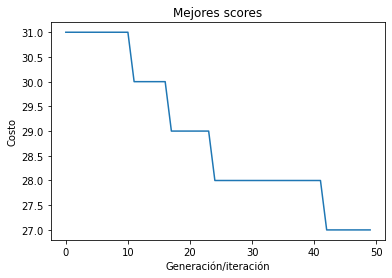

In [34]:
# Gráfico del mejor score de cada generación/iteración
plt.plot(mejores_scores)
plt.title("Mejores scores")
plt.xlabel("Generación/iteración")
plt.ylabel("Costo")
plt.show()

In [35]:
print(f"la mejor solución obtenida tuvo un costo de: {score_genetico}")
print(f"la solución es: {sol_genetica}")

la mejor solución obtenida tuvo un costo de: 27
la solución es: [23. 17. 16. 13. 22. 18. 24.  3.  4.  2. 15. 14.  1. 26. 19. 27. 29. 12.
 28.  9. 10. 25.  7. 20. 11. 21.  0.  6.  8.  5.]


Obsérvese cómo se pudo obtener una puntuación de __27__ cuando la mejor hasta ahora era por algoritmos voraces de __29__, demostrando que una técnica de algoritmos genéticos o evolutivos es muy prometedora en este problema. 

**NOTA: el algoritmo genético no siempre encontrará la solución de 27. Esto depende de cuántas iteraciones corra y de la configuración de los demás parámetros presentados en la función**

## 7. Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Para este problema podríamos encontrar muchos tipos de variaciones. 

Por ejemplo:
> * modificar el número de tomas
> * modificar el número de actores
> * modificar el número de tomas máximas por sesión
> * __modificar los actores requeridos por cada toma__

En el caso de este trabajo plantearemos una modificación a los actores requeridos por cada toma. 

De esta manera solo tenemos que modificar el objeto **data** de tal manera que seguimos contando con las mismas dimensiones del problema y no tenemos que modificar nada del código desarrollado en todas las secciones anteriores

### Modificación del objeto **data**
Este objeto es básicamente una matriz con 0s y 1s que representa qué actores van en qué toma. 

Se realizó una matriz aleatoria, diferente a la original pero en la misma estructura, de modo que cargaremos este archivo llamada "actores_tomas_inventados.csv" y sobre escribiremos el objeto data con la nueva información.

La nueva data generada se creó de tal forma que tuviera aproximadamente la misma proporción de 0s y 1s que la data original, para que los problemas sean más comparables entre ellos. Esto es aproximadamente un 31% de las entradas de la matriz son 1s

In [36]:
print("la data anterior se veía así:")
display(data.head())

la data anterior se veía así:


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,1,0,0
5,0,1,0,1,0,0,0,1,0,0


In [37]:
print("la data anterior se veía así:")
display(data.head())

la data anterior se veía así:


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,1,0,0
5,0,1,0,1,0,0,0,1,0,0


In [38]:
# Carga de los datos
data = pd.read_csv("actores_tomas_inventados.csv", sep=";")
data = data.set_index("toma")
print("la nueva data se ve así:")
display(data.head())

la nueva data se ve así:


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
1,0,1,0,0,0,1,1,0,0,0
2,0,1,0,1,1,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0
5,1,0,1,0,1,0,0,1,0,1


Nótese cómo los actores que iban en la toma 1, ya no son exactamente los mismos que irán en la toma 1 y eso ocurre con todas las tomas


## 8. Aplica el algoritmo al juego de datos generado
En esta sección aplicaremos los métodos anteriormente usados al juego de datos generado

### Generar soluciones aleatorias
Exploremos qué pasa cuando generamos soluciones aleatorias

In [39]:
evaluar_poblacion(crear_poblacion(10))

[44, 49, 45, 46, 46, 44, 45, 43, 41, 46]

Nótese cómo para este problema, una solución aleatoria está al rededor de un costo de 49. 
En la data original el costo aleatorio se encontraba al rededor de 38-40

### búsqueda local

In [40]:
solucion, costo, iteracion = busqueda_local(30, verbose=True)

iteracion: 1, mejor_costo: 42
mejor_solucion [24 23  9  1 10 27  2 20 19 26 17 29  8  0  5 11 16 25  7  3 12 13 22  6
  4 21 28 15 14 18]

iteracion: 2, mejor_costo: 40
mejor_solucion [24 23  9  1 10 27  2 20 19 26 17 29  8  0  5 11 16 18  7  3 12 13 22  6
  4 21 28 15 14 25]

iteracion: 3, mejor_costo: 38
mejor_solucion [24 23  9  1 10 27  2 20 19 22 17 29  8  0  5 11 16 18  7  3 12 13 26  6
  4 21 28 15 14 25]

iteracion: 4, mejor_costo: 37
mejor_solucion [24 23  9  1 10 27  2 20 19 22 17 29  8  0  5 11 16 18  7 25 12 13 26  6
  4 21 28 15 14  3]

iteracion: 5, mejor_costo: 36
mejor_solucion [24 23  9  1 10 27  2 20 25 22 17 29  8  0  5 11 16 18  7 19 12 13 26  6
  4 21 28 15 14  3]

iteracion: 6, mejor_costo: 35
mejor_solucion [24 23  9  1 10 27  2 20 25 22 17 29  8  0  6 11 16 18  7 19 12 13 26  5
  4 21 28 15 14  3]

iteracion: 7, mejor_costo: 35
mejor_solucion [24 23  9  1 10 27  2 20 25 22 17 29  8  0  6 11 16 18  7 19 12 13 26  5
  4 21 28 15 14  3]



Ya se alcanzan soluciones del orden de 33 por el método de búsqueda local

In [41]:
tomas_disponibles

set()

### Solución por técnica voraz

In [42]:
tomas_disponibles = set(range(30))
subsets_optimos = []
for i in range(5):
    print("#" * 50)
    print(f"hay {len(tomas_disponibles)} disponibles")
    print()
    best_subset = get_subsets_optimos(tomas_disponibles)
    
    # actualizo los disponibles
    tomas_disponibles = tomas_disponibles - set(best_subset)
    subsets_optimos.append(list(best_subset))
    print()

##################################################
hay 30 disponibles

iteración: 0, costo: 10, combinación: (0, 1, 2, 3, 4, 5)
iteración: 25, costo: 9, combinación: (0, 1, 2, 3, 5, 6)
iteración: 670, costo: 8, combinación: (0, 1, 2, 5, 8, 9)
iteración: 8318, costo: 7, combinación: (0, 1, 5, 8, 9, 19)
iteración: 20776, costo: 6, combinación: (0, 2, 3, 5, 6, 8)
iteración: 25406, costo: 5, combinación: (0, 2, 5, 6, 8, 18)
Iteración # 29688/593775 (5.00%)
Iteración # 59376/593775 (10.00%)
iteración: 66000, costo: 4, combinación: (0, 5, 6, 8, 18, 19)
Iteración # 89064/593775 (15.00%)
Iteración # 118752/593775 (20.00%)
Iteración # 148440/593775 (25.00%)
Iteración # 178128/593775 (30.00%)
Iteración # 207816/593775 (35.00%)
Iteración # 237504/593775 (40.00%)
iteración: 246514, costo: 3, combinación: (2, 5, 7, 8, 15, 19)
Iteración # 267192/593775 (45.00%)
Iteración # 296880/593775 (50.00%)
Iteración # 326568/593775 (55.00%)
Iteración # 356256/593775 (60.00%)
Iteración # 385944/593775 (65.00%)


In [43]:
subsets_optimos

[[2, 5, 7, 8, 15, 19],
 [0, 3, 6, 18, 21, 25],
 [1, 9, 12, 13, 23, 27],
 [4, 10, 14, 20, 24, 28],
 [11, 16, 17, 22, 26, 29]]

In [44]:
solucion_voraz = np.array(subsets_optimos).reshape(30)
solucion_voraz

array([ 2,  5,  7,  8, 15, 19,  0,  3,  6, 18, 21, 25,  1,  9, 12, 13, 23,
       27,  4, 10, 14, 20, 24, 28, 11, 16, 17, 22, 26, 29])

In [45]:
print(f"la solución voraz tiene un costo de: {evaluar_solucion(solucion_voraz)}")

la solución voraz tiene un costo de: 33


### Algorimos genéticos
Evaluemos también acá la técnica de algorimos genéticos

In [46]:
sol_genetica, score_genetico, mejores_scores = ejecutar_genetico(num_iteraciones = 30, tam_pob=20000, n_best=2000, num_cruces=8000)

iteración 0
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahora es 38
la mejor solución es: [20  8 13 12 19 18 21 28 26  0 22  5  3  6  1 23  9 25 29 27 24 10 16 17
 15 11  2  4 14  7]
count    20000.00000
mean        44.77340
std          1.74359
min         38.00000
25%         44.00000
50%         45.00000
75%         46.00000
max         50.00000
Name: score, dtype: float64
cruzando los mejores

iteración 1
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahora es 37
la mejor solución es: [16.  7. 22.  4. 17. 11. 10. 29. 13.  8.  2.  6.  9. 12. 23.  1.  0. 21.
 25. 24. 27. 18. 26.  3. 15. 20.  5. 28. 14. 19.]
count    20000.00000
mean        43.91610
std          1.84706
min         37.00000
25%         43.00000
50%         44.00000
75%         45.00000
max         50.00000
Name: score, dtype: float64
cruzando los mejores

iteración 2
evaluando a la población de: 20000 individuos
Mejor Score de la población hasta ahor

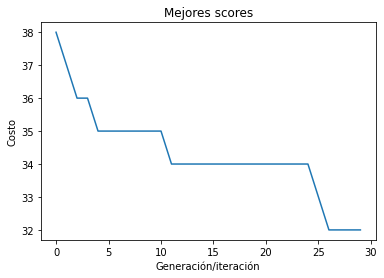

In [47]:
# Gráfico del mejor score de cada generación/iteración
plt.plot(mejores_scores)
plt.title("Mejores scores")
plt.xlabel("Generación/iteración")
plt.ylabel("Costo")
plt.show()

In [48]:
print(f"la mejor solución obtenida tuvo un costo de: {score_genetico}")
print(f"la solución es: {sol_genetica}")

la mejor solución obtenida tuvo un costo de: 32
la solución es: [ 4.  5.  2. 15. 19.  7. 17. 23.  1. 22. 16.  9. 10. 24. 20. 13. 27. 14.
 12.  6. 11. 26. 29. 28. 18.  0. 25.  3.  8. 21.]


### Comparativa de resultados

Puede notar cómo la data original se podía organizar de una forma menos costosa.
En la siguiente tabla veremos una comparación de los métodos aplicados a ambos sets de datos





Técnica | Mejor costo en data original | Mejor costo data aleatoria
--| -- | -- 
solución aleatoria | 38 | 45
búsqueda local | 30 | 35
técnica voraz | 29 | 33
algoritmos genéticos | 27 | 32



## 9. Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Para la realización de este trabajo no se consultaron fuentes externas. 

Se realizó con conocimiento adquirido en el curso y conocimiento previo.

## 10. Describe brevemente las lineas de cómo crees que es posible avanzar en el estudio del problema. 
Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Según lo observado en este trabajo, los algoritmos evolutivos pueden ser muy prometedores en la obtención de buenas soluciones para este problema. 

Por esta razón, pienso que avanzar en algoritmos evolutivos aplicados a este problema podrían llevar a aún mejores soluciones que 27. 

En este sentido plantearía mejoras desde:
> 1. Método de cruce: experimentar con métodos de cruce distintos al acá planteado.
> 2. Método de selección: variar los hiperparámetros de selección y experimentar con métodos de selección distintos al acá planteado

Otra alternativa que veo viable para avanzar en el estudio de este problema sería **combinar técnicas**

Ya vimos el poder de los algoritmos genéticos, qué tal si se potencia con poblaciones aleatorias y los vecinos de las mejores soluciones (búsqueda local). También si se inicializa con varios vecinos "buenos" encontrados por búsqueda local o recocido simulado.